In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df = pd.read_csv('randomForest.csv')

In [3]:
def parse_simul_df(df):
    df = df[df['Module'].str.contains("appl")]
    important_attrs = ['Module','Name','Unnamed: 18','runattr:iterationvarsf']
    df = df[important_attrs]
    run_attrs_dict = defaultdict(list)
    for run_attrs in df['runattr:iterationvarsf']:
        run_attrs_arr = run_attrs.split(',')
        run_attrs_dict['edf = pd.read_csv('randomForest.csv')xpected_reliability'].append(run_attrs_arr[0])
        run_attrs_dict['computation_task'].append(run_attrs_arr[1])
        run_attrs_dict['replication_factor'].append(run_attrs_arr[2])
        run_attrs_dict['reputation_on'] .append(run_attrs_arr[3][:len(run_attrs_arr[3])-1])
    run_attrs_df = pd.DataFrame(run_attrs_dict,index=df.index)
    final_df = pd.concat([df,run_attrs_df],axis=1,sort=False)
    return final_df

In [4]:
final_df = parse_simul_df(df)

In [5]:
lb = final_df[final_df.Name=='Load Balancer : 2 work finished']

In [6]:
er_values = final_df['expected_reliability'].unique()
ct_values = final_df['computation_task'].unique()
rf_values = ['1','2']
ro_values = ['false','true']

In [7]:
#Checking to see if replication helps
ro = 'false'
index = []
rf1 = []
rf2 = []
for ct in ct_values:
    for er in er_values:
        index.append("{},{}".format(ct,er))
        for rf in rf_values:
            tmp_df = lb[(lb.replication_factor==rf) & (lb.expected_reliability==er)] 
            parsed_series =  tmp_df['Unnamed: 18'][(tmp_df.computation_task==ct) & (tmp_df.reputation_on==ro)]
            if rf=='1':
                rf1.append(parsed_series[parsed_series.first_valid_index()])
            else:
                rf2.append(parsed_series[parsed_series.first_valid_index()])

In [8]:
rf_df = pd.DataFrame({'replication factor of 1':rf1,'replication factor of 2':rf2},index=index)

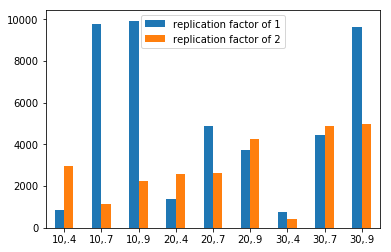

In [9]:
ax =rf_df.plot.bar(rot=0)

In [13]:
df_2 = pd.read_csv('randomForest.csv')
df_4 = pd.read_csv('randomForest4.csv')
df_6 = pd.read_csv('randomForest6.csv')
df_8 = pd.read_csv('randomForest8.csv')

In [28]:
def parse_simul_df_without_replication_on(df):
    df = df[df['Module'].str.contains("appl")]
    important_attrs = ['Module','Name','Unnamed: 18','runattr:iterationvarsf']
    df = df[important_attrs]
    run_attrs_dict = defaultdict(list)
    for run_attrs in df['runattr:iterationvarsf']:
        run_attrs_arr = run_attrs.split(',')
        run_attrs_dict['expected_reliability'].append(run_attrs_arr[0])
        run_attrs_dict['computation_task'].append(run_attrs_arr[1])
        run_attrs_dict['replication_factor'].append(run_attrs_arr[2][:len(run_attrs_arr[2])-1])
    run_attrs_df = pd.DataFrame(run_attrs_dict,index=df.index)
    final_df = pd.concat([df,run_attrs_df],axis=1,sort=False)
    return final_df

In [31]:
df_2 =parse_simul_df(df_2)
df_2 = df_2[df_2.reputation_on=='false']

In [33]:
df_4 = parse_simul_df_without_replication_on(df_4)
df_6 = parse_simul_df_without_replication_on(df_6)
df_8 = parse_simul_df_without_replication_on(df_8)

In [34]:
num_mcs = [2,4,6,8]
num_mc_to_df = {2:df_2,4:df_4,6:df_6,8:df_8}

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting 
Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')
plt.show()

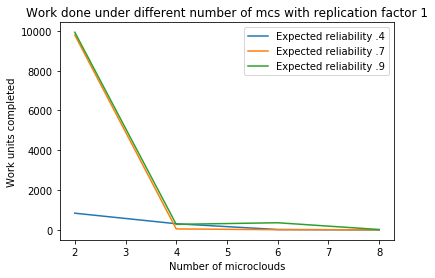

In [40]:
index = []
rf = '1'
ct = '10'
for er in er_values:
    work = []
    for num_mc in num_mcs:
        tmp_df = num_mc_to_df[num_mc]
        lb = tmp_df[tmp_df.Name=='Load Balancer : 2 work finished']
        tmp_df = lb[(lb.replication_factor==rf) & (lb.expected_reliability==er)] 
        parsed_series =  tmp_df['Unnamed: 18'][(tmp_df.computation_task==ct)]
        work.append(parsed_series[parsed_series.first_valid_index()])
    plt.plot(num_mcs,work,label="Expected reliability {}".format(er))
plt.xlabel("Number of microclouds")
plt.ylabel("Work units completed")
plt.title("Work completed with computation task of 10 and replication factor 1")
plt.legend(loc="best")
plt.show()
        

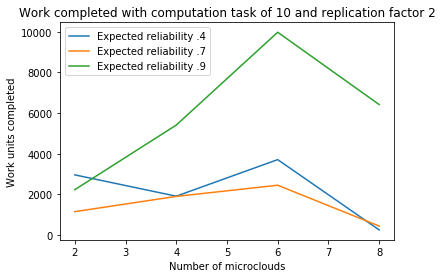

In [42]:
index = []
rf = '2'
ct = '10'
for er in er_values:
    work = []
    for num_mc in num_mcs:
        tmp_df = num_mc_to_df[num_mc]
        lb = tmp_df[tmp_df.Name=='Load Balancer : 2 work finished']
        tmp_df = lb[(lb.replication_factor==rf) & (lb.expected_reliability==er)] 
        parsed_series =  tmp_df['Unnamed: 18'][(tmp_df.computation_task==ct)]
        work.append(parsed_series[parsed_series.first_valid_index()])
    plt.plot(num_mcs,work,label="Expected reliability {}".format(er))
plt.xlabel("Number of microclouds")
plt.ylabel("Work units completed")
plt.title("Work completed with computation task of 10 and replication factor 2")
plt.legend(loc="best")
plt.show()
        

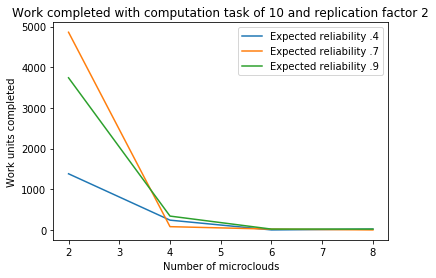

In [45]:
index = []
rf = '1'
ct = '20'
for er in er_values:
    work = []
    for num_mc in num_mcs:
        tmp_df = num_mc_to_df[num_mc]
        lb = tmp_df[tmp_df.Name=='Load Balancer : 2 work finished']
        tmp_df = lb[(lb.replication_factor==rf) & (lb.expected_reliability==er)] 
        parsed_series =  tmp_df['Unnamed: 18'][(tmp_df.computation_task==ct)]
        work.append(parsed_series[parsed_series.first_valid_index()])
    plt.plot(num_mcs,work,label="Expected reliability {}".format(er))
plt.xlabel("Number of microclouds")
plt.ylabel("Work units completed")
plt.title("Work completed with computation task of 10 and replication factor 2")
plt.legend(loc="best")
plt.show()
        

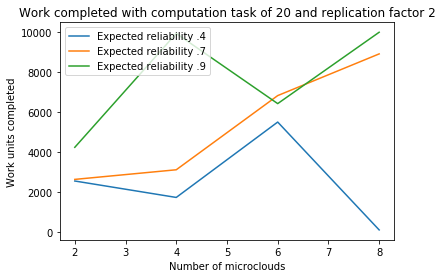

In [44]:
index = []
rf = '2'
ct = '20'
for er in er_values:
    work = []
    for num_mc in num_mcs:
        tmp_df = num_mc_to_df[num_mc]
        lb = tmp_df[tmp_df.Name=='Load Balancer : 2 work finished']
        tmp_df = lb[(lb.replication_factor==rf) & (lb.expected_reliability==er)] 
        parsed_series =  tmp_df['Unnamed: 18'][(tmp_df.computation_task==ct)]
        work.append(parsed_series[parsed_series.first_valid_index()])
    plt.plot(num_mcs,work,label="Expected reliability {}".format(er))
plt.xlabel("Number of microclouds")
plt.ylabel("Work units completed")
plt.title("Work completed with computation task of {} and replication factor {}".format(ct,rf))
plt.legend(loc="best")
plt.show()